<a href="https://colab.research.google.com/github/Maxwell-Tuttle/COS470/blob/NLP_Assignment1_MaxTuttle/COS470_Assignment1_Question2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np
import string

In [2]:
data = "Posts_Coffee.xml"

In [4]:
df = pd.read_xml(data)
df

,Id,PostTypeId,AcceptedAnswerId,CreationDate,Score,ViewCount,Body,OwnerUserId,LastActivityDate,Title,...,CommentCount,FavoriteCount,ContentLicense,LastEditorUserId,LastEditDate,ParentId,ClosedDate,OwnerDisplayName,LastEditorDisplayName,CommunityOwnedDate
0,1,1,24.0,2015-01-27T20:09:32.720,48,2847.0,"<p>I just got a pound of microroasted, local c...",4.0,2019-02-04T13:15:48.970,How should I store whole bean coffee?,...,4,11.0,CC BY-SA 3.0,NaN,None,NaN,None,None,None,None
1,2,1,22.0,2015-01-27T20:13:58.610,7,1066.0,<p>I manually grind coffee beans for drip coff...,8.0,2015-01-27T21:13:20.537,How fine should I grind coffee for drip/pour o...,...,4,NaN,CC BY-SA 3.0,8.0,2015-01-27T21:13:20.537,NaN,None,None,None,None
2,3,1,15.0,2015-01-27T20:20:05.700,30,1614.0,<p>I live in a hard water area and when brewin...,8.0,2019-11-28T09:51:33.867,Does the hardness of water matter when making ...,...,1,NaN,CC BY-SA 3.0,262.0,2016-05-02T01:36:46.847,NaN,None,None,None,None
3,4,1,37.0,2015-01-27T20:30:33.657,10,302.0,"<p>I own a drip coffee pot:\n<img src=""https:/...",8.0,2015-01-27T21:58:54.353,What's the theory behind using thin spouted ke...,...,8,1.0,CC BY-SA 3.0,8.0,2015-01-27T21:26:01.250,NaN,None,None,None,None
4,5,1,8.0,2015-01-27T20:34:58.077,20,1212.0,<p>I observe that coffee servers (I refuse to ...,8.0,2022-02-24T19:13:05.100,How important is tamping coffee for an espress...,...,0,NaN,CC BY-SA 3.0,8.0,2015-01-27T20:46:23.583,NaN,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4208,5924,2,NaN,2022-05-20T20:48:39.647,0,NaN,<p>I just read that milk binds to the tannins ...,11461.0,2022-05-20T20:48:39.647,None,...,1,NaN,CC BY-SA 4.0,NaN,None,2570.0,None,None,None,None
4209,5925,1,NaN,2022-05-26T16:23:56.667,0,30.0,<p>I have an 8 months old Delonghi ecp3420 tha...,11471.0,2022-05-26T16:26:03.550,Yet another question about no pressure in coff...,...,2,NaN,CC BY-SA 4.0,6506.0,2022-05-26T16:26:03.550,NaN,None,None,None,None
4210,5927,2,NaN,2022-05-31T21:17:32.843,2,NaN,<h1>No</h1>\n<p>The short answer is just <stro...,9401.0,2022-05-31T21:17:32.843,None,...,0,NaN,CC BY-SA 4.0,NaN,None,2815.0,None,None,None,None
4211,5928,1,NaN,2022-06-03T16:34:00.753,0,10.0,<p>When I landed to my new job I was surprised...,11489.0,2022-06-03T16:34:00.753,Should we clean portafilter immediately?,...,0,NaN,CC BY-SA 4.0,NaN,None,NaN,None,None,None,None


In [5]:
q_list = df['Title'].values.tolist()

In [6]:
#Get rid of None values
temp_list = []
for val in q_list:
  if val != None:
    temp_list.append(val)

q_list = temp_list

In [21]:
#turn the list into a string and turns to all lower case
string = ""
for ele in q_list:
  string += (ele + " ")

punc = '''!()-[]{};:"\,<>./?@#$%^&*_~'''

for ele in string:
    if ele in punc:
        string = string.replace(ele, "")

string = string.lower()
print(string)

how should i store whole bean coffee how fine should i grind coffee for drippour over coffee does the hardness of water matter when making coffee what's the theory behind using thin spouted kettles when making drippour over coffee how important is tamping coffee for an espresso machine why is it not recommended to drink coffee immediately after it's roasted what factors affect espresso crema why do barista's keep activating the doser whilst grinding coffee how should i store ground coffee how long can i store ground coffee in the fridge what is the process to reduce bitterness in coffee how does the temperature of the water affect the taste of the coffee homemade cleaner for basic drip coffee maker upward size limit for espresso makers are highend cone grinders adjustable what type of roast has the lowest caffeine content how do i backflush my espresso machine how hot should water be to brew ground coffee directly in a cup what is the hexagon funnel shaped thing that came with my aerop

In [22]:
#This stores the split words into "words" and prints the length to gives total and unique word counts
words = string.split(" ")
print("Total words: " + str(len(words)))
print("Unique words: " + str(len(set(words))))

Total words: 12296
Unique words: 2306


In [23]:
print(words)

['how', 'should', 'i', 'store', 'whole', 'bean', 'coffee', 'how', 'fine', 'should', 'i', 'grind', 'coffee', 'for', 'drippour', 'over', 'coffee', 'does', 'the', 'hardness', 'of', 'water', 'matter', 'when', 'making', 'coffee', "what's", 'the', 'theory', 'behind', 'using', 'thin', 'spouted', 'kettles', 'when', 'making', 'drippour', 'over', 'coffee', 'how', 'important', 'is', 'tamping', 'coffee', 'for', 'an', 'espresso', 'machine', 'why', 'is', 'it', 'not', 'recommended', 'to', 'drink', 'coffee', 'immediately', 'after', "it's", 'roasted', 'what', 'factors', 'affect', 'espresso', 'crema', 'why', 'do', "barista's", 'keep', 'activating', 'the', 'doser', 'whilst', 'grinding', 'coffee', 'how', 'should', 'i', 'store', 'ground', 'coffee', 'how', 'long', 'can', 'i', 'store', 'ground', 'coffee', 'in', 'the', 'fridge', 'what', 'is', 'the', 'process', 'to', 'reduce', 'bitterness', 'in', 'coffee', 'how', 'does', 'the', 'temperature', 'of', 'the', 'water', 'affect', 'the', 'taste', 'of', 'the', 'coffee

In [24]:
frequency = {}

words = re.findall(r'\b[A-Za-z][a-z]{2,9}\b', string)
        
for word in words:
  count = frequency.get(word,0)
  frequency[word] = count + 1

most_frequent = dict(sorted(frequency.items(), key=lambda elem: elem[1], reverse=True))

top_count = 0
        
for idx, (words, frequency) in enumerate(most_frequent.items()):
  if idx == 0:
    top_count = frequency
  print(words, frequency)

coffee 765
the 414
how 274
what 269
for 192
does 138
espresso 134
and 126
with 111
can 110
are 97
beans 92
why 78
machine 73
make 73
moka 70
water 66
pot 64
should 62
brew 60
press 57
when 55
caffeine 55
taste 53
there 50
french 49
ground 47
use 47
cold 46
cup 45
from 45
milk 45
brewing 45
filter 44
grinder 39
between 39
good 36
after 35
that 34
aeropress 34
difference 32
you 32
using 31
any 29
this 29
instant 29
grind 28
not 28
much 28
get 28
best 28
long 27
shot 26
drip 25
grounds 25
affect 24
maker 24
roast 24
which 24
have 23
before 23
time 23
too 23
home 22
way 22
out 22
method 22
flavor 21
will 21
roasting 21
without 21
than 21
latte 20
need 20
clean 20
more 20
bean 19
over 19
hot 19
drinking 19
some 19
better 19
pour 19
size 18
possible 18
making 17
crema 17
extraction 17
like 17
filters 17
quality 17
keep 16
different 16
store 15
most 15
brewed 15
safe 15
bad 15
used 15
machines 14
turkish 14
one 14
really 14
same 14
drink 13
grinding 13
type 13
has 13
acidic 13
pressure 13
keu

In [30]:
print(most_frequent)

{'coffee': 765, 'the': 414, 'how': 274, 'what': 269, 'for': 192, 'does': 138, 'espresso': 134, 'and': 126, 'with': 111, 'can': 110, 'are': 97, 'beans': 92, 'why': 78, 'machine': 73, 'make': 73, 'moka': 70, 'water': 66, 'pot': 64, 'should': 62, 'brew': 60, 'press': 57, 'when': 55, 'caffeine': 55, 'taste': 53, 'there': 50, 'french': 49, 'ground': 47, 'use': 47, 'cold': 46, 'cup': 45, 'from': 45, 'milk': 45, 'brewing': 45, 'filter': 44, 'grinder': 39, 'between': 39, 'good': 36, 'after': 35, 'that': 34, 'aeropress': 34, 'difference': 32, 'you': 32, 'using': 31, 'any': 29, 'this': 29, 'instant': 29, 'grind': 28, 'not': 28, 'much': 28, 'get': 28, 'best': 28, 'long': 27, 'shot': 26, 'drip': 25, 'grounds': 25, 'affect': 24, 'maker': 24, 'roast': 24, 'which': 24, 'have': 23, 'before': 23, 'time': 23, 'too': 23, 'home': 22, 'way': 22, 'out': 22, 'method': 22, 'flavor': 21, 'will': 21, 'roasting': 21, 'without': 21, 'than': 21, 'latte': 20, 'need': 20, 'clean': 20, 'more': 20, 'bean': 19, 'over':

In [25]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [40]:
stop_words = set(stopwords.words('english'))
word_tokens = word_tokenize(' '.join(list(most_frequent.keys())))

#converts the words in word_tokens to lower case and then checks whether 
#they are present in stop_words or not
filtered_string = [w for w in word_tokens if not w.lower() in stop_words]
filtered_string = []

for w in word_tokens:
    if w not in stop_words:
        filtered_string.append(w)
  
print(word_tokens)
print(filtered_string)

['coffee', 'the', 'how', 'what', 'for', 'does', 'espresso', 'and', 'with', 'can', 'are', 'beans', 'why', 'machine', 'make', 'moka', 'water', 'pot', 'should', 'brew', 'press', 'when', 'caffeine', 'taste', 'there', 'french', 'ground', 'use', 'cold', 'cup', 'from', 'milk', 'brewing', 'filter', 'grinder', 'between', 'good', 'after', 'that', 'aeropress', 'difference', 'you', 'using', 'any', 'this', 'instant', 'grind', 'not', 'much', 'get', 'best', 'long', 'shot', 'drip', 'grounds', 'affect', 'maker', 'roast', 'which', 'have', 'before', 'time', 'too', 'home', 'way', 'out', 'method', 'flavor', 'will', 'roasting', 'without', 'than', 'latte', 'need', 'clean', 'more', 'bean', 'over', 'hot', 'drinking', 'some', 'better', 'pour', 'size', 'possible', 'making', 'crema', 'extraction', 'like', 'filters', 'quality', 'keep', 'different', 'store', 'most', 'brewed', 'safe', 'bad', 'used', 'machines', 'turkish', 'one', 'really', 'same', 'drink', 'grinding', 'type', 'has', 'acidic', 'pressure', 'keurig', 'e

In [42]:
top_20_all_words = list(most_frequent.keys())[0:20]
top_20_no_stop_words = filtered_string[0:20]

print(top_20_all_words) 
print(top_20_no_stop_words)

['coffee', 'the', 'how', 'what', 'for', 'does', 'espresso', 'and', 'with', 'can', 'are', 'beans', 'why', 'machine', 'make', 'moka', 'water', 'pot', 'should', 'brew']
['coffee', 'espresso', 'beans', 'machine', 'make', 'moka', 'water', 'pot', 'brew', 'press', 'caffeine', 'taste', 'french', 'ground', 'use', 'cold', 'cup', 'milk', 'brewing', 'filter']


In [44]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

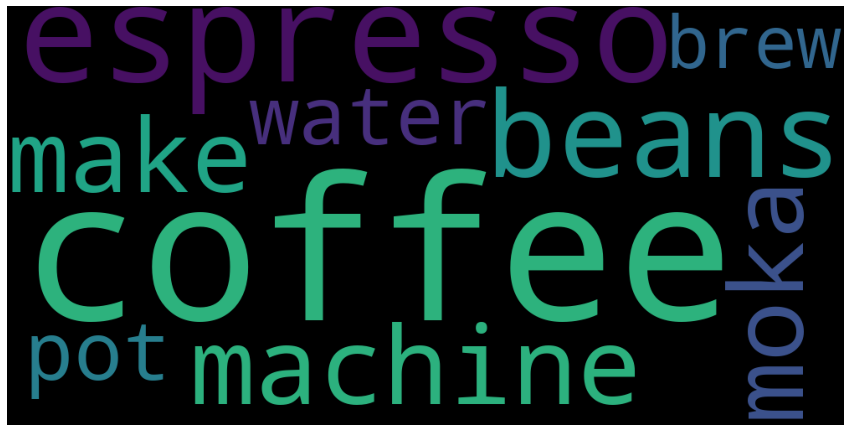

coffee the how what for does espresso and with can are beans why machine make moka water pot should brew


In [48]:
#convert list to string and generate
string_all = (" ").join(top_20_all_words)
wordcloud = WordCloud(width = 1000, height = 500).generate(string_all)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")

plt.show()
plt.close()
print(string_all)

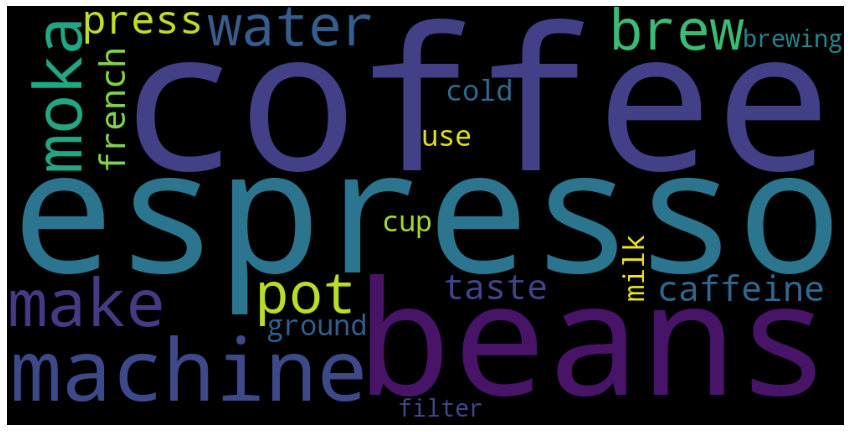

coffee the how what for does espresso and with can are beans why machine make moka water pot should brew


In [49]:
#convert list to string and generate
string_no_stop = (" ").join(top_20_no_stop_words)
wordcloud = WordCloud(width = 1000, height = 500).generate(string_no_stop)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")

plt.show()
plt.close()
print(string_all)

The word cloud that was being used automaticall cut out stop words so the second figure is more filled and more words can be seen.